In [13]:
import pandas as pd
from googleapiclient.discovery import build
Api_key="api_key"
def get_trending_videos(api_key, max_results=200):
    # build the youtube service
    youtube = build('youtube', 'v3', developerKey=api_key)

    # initialize the list to hold video details
    videos = []

    # fetch the most popular videos
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        chart='mostPopular',
        regionCode='fr',  
        maxResults=50
    )
    # paginate through the results if max_results > 50
    while request and len(videos) < max_results:
        response = request.execute()
        for item in response['items']:
            video_details = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': item['snippet']['categoryId'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption': item['contentDetails'].get('caption', 'false'),
                'view_count': item['statistics'].get('viewCount', 0),
                'like_count': item['statistics'].get('likeCount', 0),
                'dislike_count': item['statistics'].get('dislikeCount', 0),
                'favorite_count': item['statistics'].get('favoriteCount', 0),
                'comment_count': item['statistics'].get('commentCount', 0)
            }
            videos.append(video_details)

        # get the next page token
        request = youtube.videos().list_next(request, response)

    return videos[:max_results]
def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def main():
    trending_videos = get_trending_videos(Api_key)
    filename = 'trending_videos.csv'
    save_to_csv(trending_videos, filename)
    print(f'Trending videos saved to {filename}')

if __name__ == '__main__':
    main()

Trending videos saved to trending_videos.csv


In [14]:
import pandas as pd
trending_videos = pd.read_csv('trending_videos.csv')
trending_videos.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,oeJENlvGJpw,Désactive l'IA ou elle détruira ta vie... (ft ...,Merci à Revolut ! Vous pouvez télécharger l’ap...,2024-09-22T15:29:05Z,UCWeg2Pkate69NFdBeuRFTAw,SQUEEZIE,24,[],PT39M41S,hd,False,3282818,269327,0,0,3170
1,JHwgM3dmwoY,QUI DES 30 ? (Avec Maxime Biaggi et Elian),Nouvel épisode de « Qui des 30 » avec Maxime B...,2024-09-22T09:02:00Z,UCAhaFPP6v3WCfK5Tjao0B7A,Mastu,23,"['Mastu', 'Mastus', 'Humour', 'Matsu', 'mastu ...",PT1H17M14S,hd,False,2017427,155434,0,0,2369
2,o79RXx2Z0yU,OL vs. OM | J5 – Le Best Of #OLOM,Abonnez-vous à www.dazn.com pour suivre la Lig...,2024-09-22T21:55:41Z,UC3ABnxyYGryqn2bSLyQKkYQ,DAZN France,17,[],PT12M5S,hd,False,610260,7798,0,0,929
3,Y3miMSiEfm8,La plus mythique des ferrari !,Vous vous attendiez à un tel bolide?!❤️\n\nTou...,2024-09-22T10:00:31Z,UCMSA4KvFVDy45aQ3OnrGADA,thierry vigneau Boiserie,2,[],PT55M7S,hd,False,512797,28650,0,0,1233
4,4-tTtyGLzKg,24h avec moi pour la sortie de mon documentair...,Aujourd'hui vidéo 24H dans ma peau pour un des...,2024-09-21T12:30:04Z,UCo6Z9cEI8Hf3nyrLUfDITtA,Inoxtag 2.0,24,"['inoxtag', '24h inox', 'Kaizen', 'inox docume...",PT31M21S,hd,False,2428722,179486,0,0,3835


In [15]:
trending_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        200 non-null    object
 1   title           200 non-null    object
 2   description     200 non-null    object
 3   published_at    200 non-null    object
 4   channel_id      200 non-null    object
 5   channel_title   200 non-null    object
 6   category_id     200 non-null    int64 
 7   tags            200 non-null    object
 8   duration        200 non-null    object
 9   definition      200 non-null    object
 10  caption         200 non-null    bool  
 11  view_count      200 non-null    int64 
 12  like_count      200 non-null    int64 
 13  dislike_count   200 non-null    int64 
 14  favorite_count  200 non-null    int64 
 15  comment_count   200 non-null    int64 
dtypes: bool(1), int64(6), object(9)
memory usage: 23.8+ KB


In [16]:
trending_videos.isnull().sum()

video_id          0
title             0
description       0
published_at      0
channel_id        0
channel_title     0
category_id       0
tags              0
duration          0
definition        0
caption           0
view_count        0
like_count        0
dislike_count     0
favorite_count    0
comment_count     0
dtype: int64

C:\Users\arist\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\arist\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\arist\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\arist\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


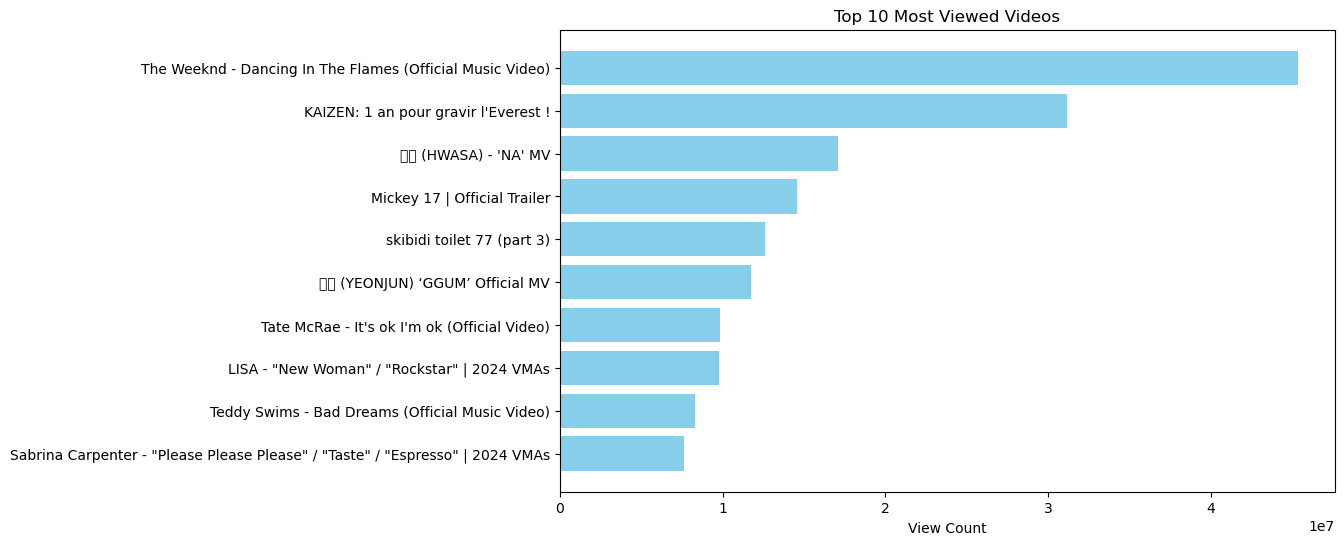

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with YouTube data
top_videos = trending_videos.nlargest(10, 'view_count')  # Top 10 videos by view count
plt.figure(figsize=(10, 6))
plt.barh(top_videos['title'], top_videos['view_count'], color='skyblue')
plt.xlabel('View Count')
plt.title('Top 10 Most Viewed Videos')
plt.gca().invert_yaxis()
plt.show()


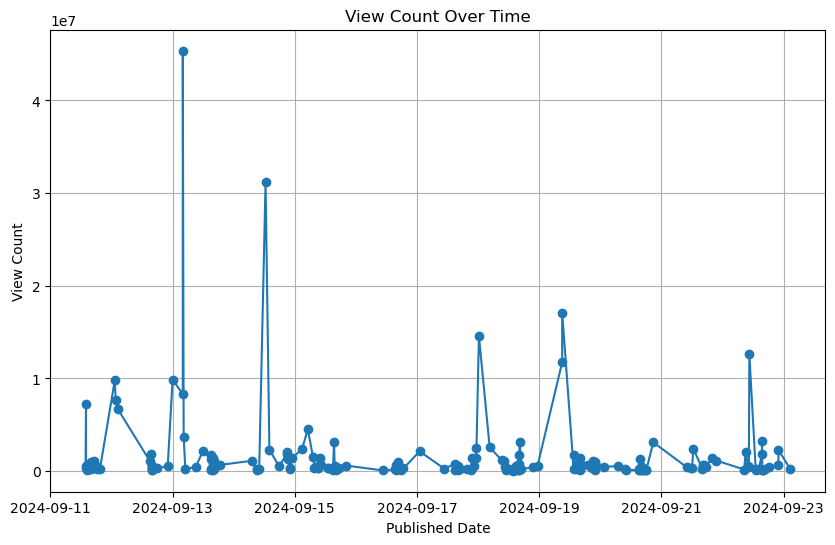

In [19]:
trending_videos['published_at'] = pd.to_datetime(trending_videos['published_at'])
trending_videos = trending_videos.sort_values(by='published_at')

plt.figure(figsize=(10, 6))
plt.plot(trending_videos['published_at'], trending_videos['view_count'], marker='o')
plt.xlabel('Published Date')
plt.ylabel('View Count')
plt.title('View Count Over Time')
plt.grid(True)
plt.show()


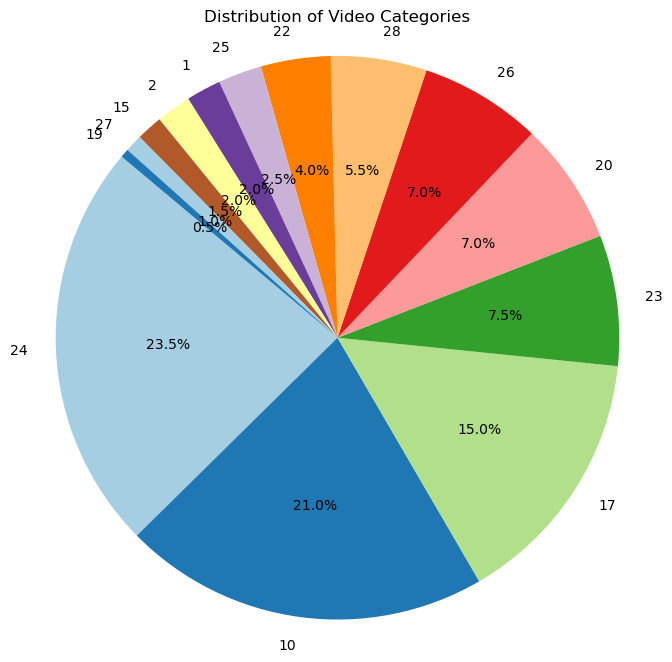

In [22]:
category_counts = trending_videos['category_id'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Video Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


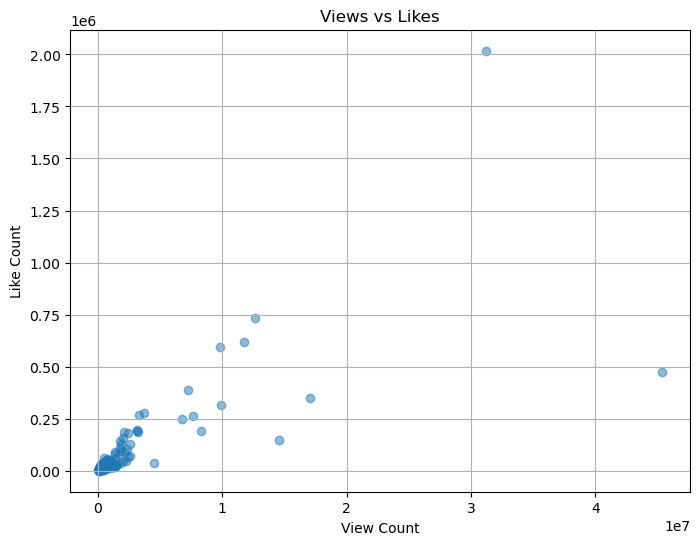

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(trending_videos['view_count'], trending_videos['like_count'], alpha=0.5)
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.title('Views vs Likes')
plt.grid(True)
plt.show()


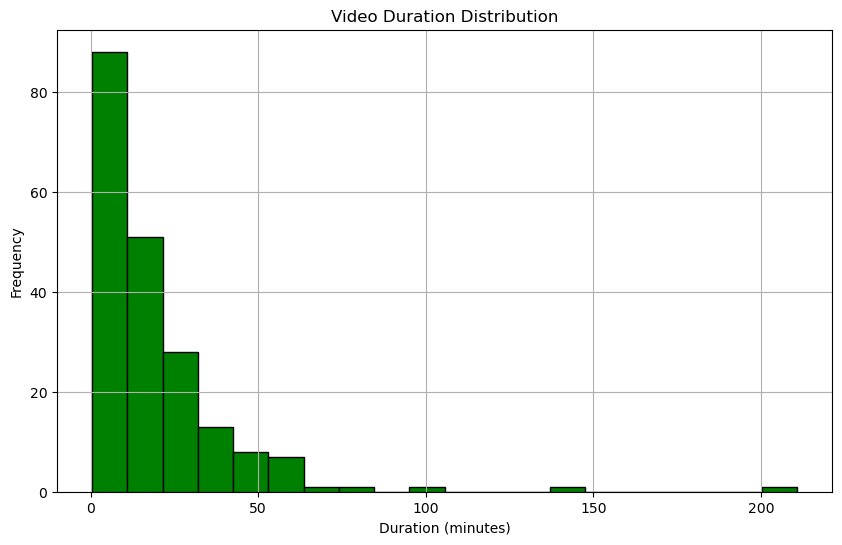

In [26]:
# Convert 'duration' to numeric value (in seconds or minutes)
trending_videos['duration_sec'] = pd.to_timedelta(trending_videos['duration']).dt.total_seconds()

plt.figure(figsize=(10, 6))
plt.hist(trending_videos['duration_sec'] / 60, bins=20, color='green', edgecolor='black')  # Convert to minutes
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Video Duration Distribution')
plt.grid(True)
plt.show()
